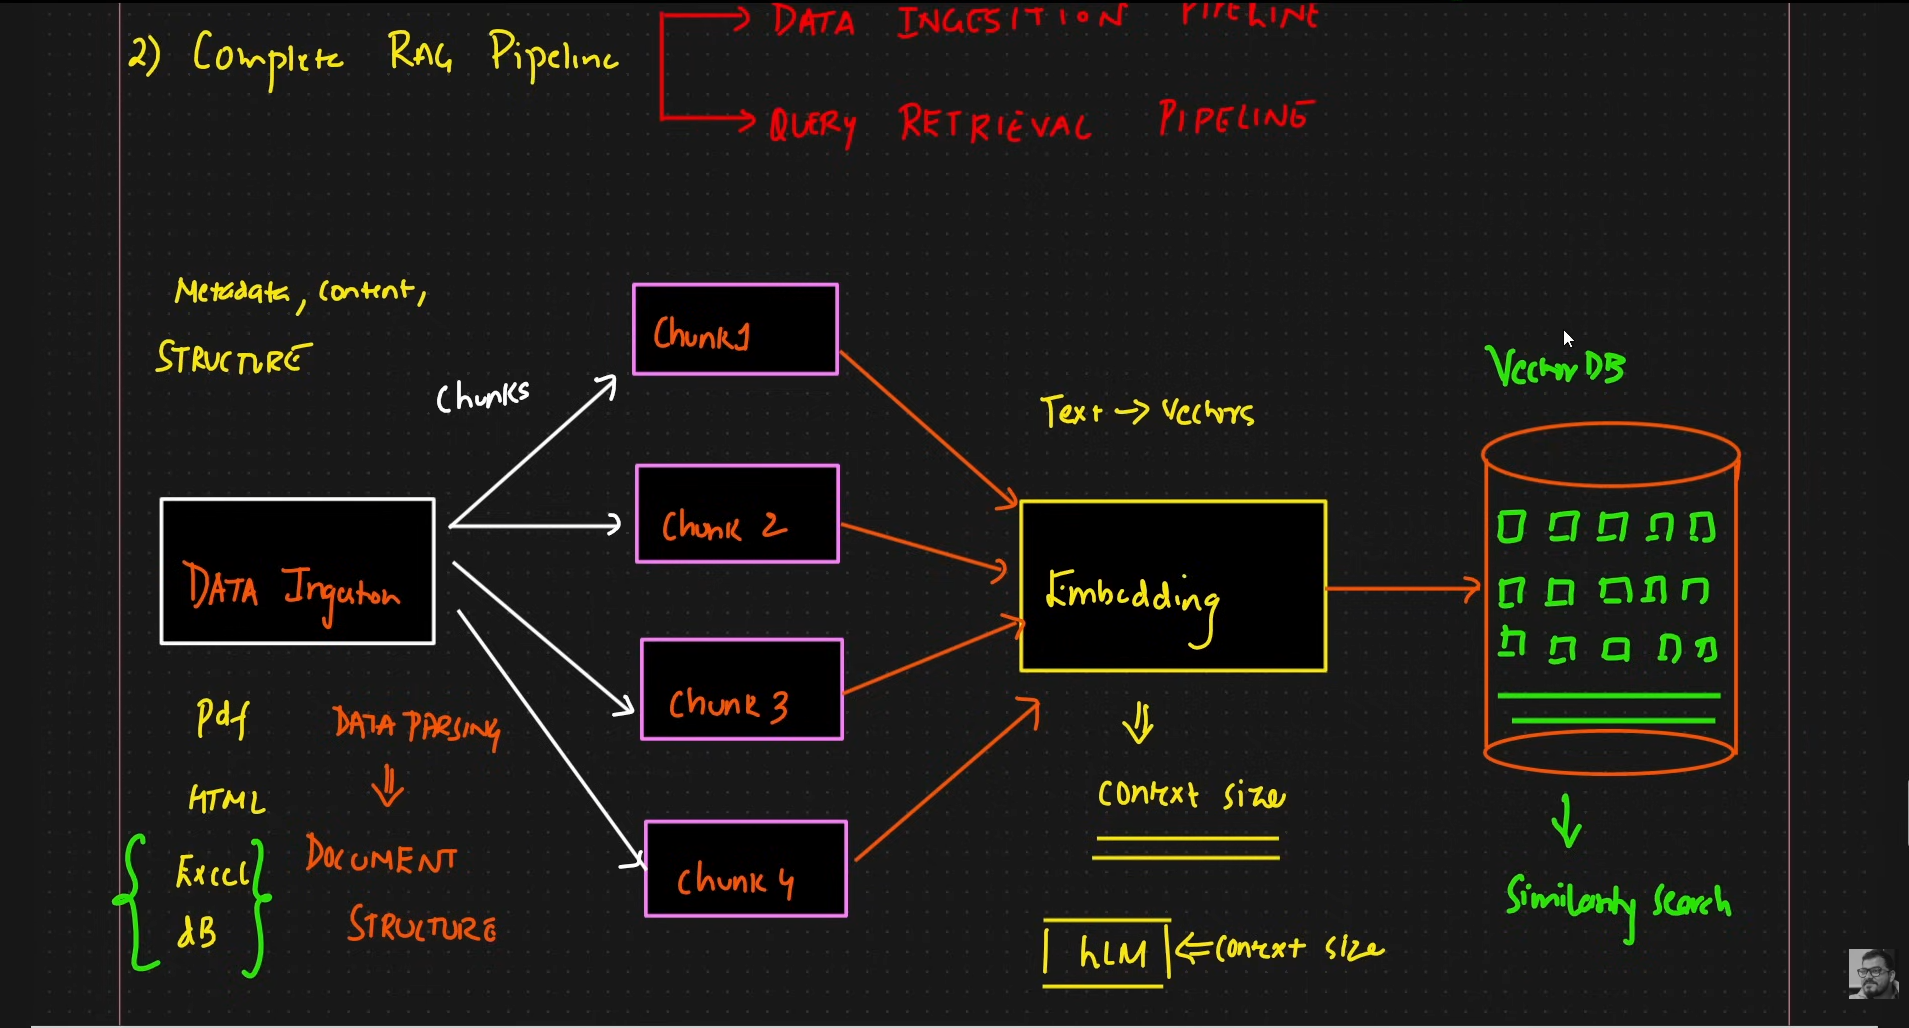

### Data Ingestion

In [2]:
### Document Structure

from langchain_core.documents import Document

In [3]:
doc = Document(
    page_content="This is the content of the file im using to create a RAG",
    metadata={
        "source": "exmaple.txt",
        "pages":1,
        "author":"Sujal",
        "date":"15-10-2025"
        },
)

doc

Document(metadata={'source': 'exmaple.txt', 'pages': 1, 'author': 'Sujal', 'date': '15-10-2025'}, page_content='This is the content of the file im using to create a RAG')

In [4]:
### Create a simple text file

import os
os.makedirs("../data/text_files", exist_ok=True)

In [9]:
sample_text = {
    "../data/text_files/example1.txt": """
        Python is a high-level, interpreted programming language known for its simplicity, readability, and versatility. 
        Created by Guido van Rossum and first released in 1991, Python emphasizes clear syntax and code readability, making it an ideal choice for beginners as well as professionals. 
        It supports multiple programming paradigms, including object-oriented, procedural, and functional programming, and has an extensive standard library that simplifies many common programming tasks.

        Today, Python is widely used across diverse fields such as web development, data science, artificial intelligence, machine learning, automation, and scientific computing. 
        Its large community and ecosystem of powerful frameworks — like Django, Flask, NumPy, and TensorFlow — make it one of the most popular and influential languages in modern software development.

    """,
}

for file_path, content in sample_text.items():
    with open(file_path, "w", encoding='utf-8') as f:
        f.write(content)
        
print("Sample text files created.")

Sample text files created.


In [10]:
### Textloader

from langchain_community.document_loaders import TextLoader

loader = TextLoader("../data/text_files/example1.txt", encoding="utf8")
document = loader.load()

document

[Document(metadata={'source': '../data/text_files/example1.txt'}, page_content='\n        Python is a high-level, interpreted programming language known for its simplicity, readability, and versatility. \n        Created by Guido van Rossum and first released in 1991, Python emphasizes clear syntax and code readability, making it an ideal choice for beginners as well as professionals. \n        It supports multiple programming paradigms, including object-oriented, procedural, and functional programming, and has an extensive standard library that simplifies many common programming tasks.\n\n        Today, Python is widely used across diverse fields such as web development, data science, artificial intelligence, machine learning, automation, and scientific computing. \n        Its large community and ecosystem of powerful frameworks — like Django, Flask, NumPy, and TensorFlow — make it one of the most popular and influential languages in modern software development.\n\n    ')]

In [13]:
## Pdf Loader

from langchain_community.document_loaders import PyMuPDFLoader
from langchain_community.document_loaders import DirectoryLoader

dir_loader = DirectoryLoader(
    "../data/pdf_files", 
    glob="**/*.pdf", 
    loader_cls=PyMuPDFLoader,
    show_progress=False
)
   
pdf_docs = dir_loader.load()
pdf_docs     

[Document(metadata={'producer': 'pdfTeX-1.40.26', 'creator': 'LaTeX with hyperref', 'creationdate': '2025-09-08T15:45:44+00:00', 'source': '..\\data\\pdf_files\\Resume.pdf', 'file_path': '..\\data\\pdf_files\\Resume.pdf', 'total_pages': 1, 'format': 'PDF 1.5', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'moddate': '2025-09-08T15:45:44+00:00', 'trapped': '', 'modDate': 'D:20250908154544Z', 'creationDate': 'D:20250908154544Z', 'page': 0}, page_content='Sujal Kumar\nEmail: sujal21102004@gmail.com\nLinkedIn: sujal-kumar-38544b229\nGithub: sujal-GITHUB\nMobile: +91-9115664773\nPortfolio: sujal.works\nEducation\n• Dr. B. R. Ambedkar National Institute of Technology\nJalandhar, India\nBachelor of Technology - Information Technology\n2022 - 2026\nCoursework: Operating Systems, Data Structures Algorithms, Machine Learning, Computer Networks, Database Management\nTechnical Skills\n• Programming Languages: C++, JavaScript, Python, C, TypeScript, SQL\n• Frameworks & Libraries: React.

### Embedding and Vector store DB

In [15]:
import numpy as np
from sentence_transformers import SentenceTransformer
import chromadb
from chromadb.config import Settings
import uuid
from typing import List, Dict, Any, Tuple
from sklearn.metrics.pairwise import cosine_similarity

d:\Work\Learning\pipeline\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
class EmbeddingManager:
    """Handles embedding generation and storage using ChromaDB and SentenceTransformer."""
    
    def __init__(self, model_name: str = "all-MiniLM-L6-v2"):
        '''
        Initializes the EmbeddingManager with:
        Model name : Hugging Face model name for sentence embeddings
        '''
        
        self.model_name = model_name
        self.model = None
        self._load_model()
    
    def _load_model(self):
        """Loads the SentenceTransformer model."""
        
        try:
            print(f"Loading model: {self.model_name}")
            self.model = SentenceTransformer(self.model_name)
            print("Model loaded successfully with dimension:", self.model.get_sentence_embedding_dimension())
        except Exception as e:
            print(f"Error loading model: {e}")
            raise
        
    def generate_embedding(self, text: str) -> np.ndarray:
        """Generates an embedding for the given text."""
        
        if not self.model:
            raise ValueError("Model not loaded.")
        
        print(f"Generating embedding for {len(texts)} texts...")
        embeddings = self.model.encode(texts, show_progress_bar=True)
        print(f"Embeddings generated with shape: {embeddings.shape}")
        return embeddings
    
embedder_manager = EmbeddingManager()
embedder_manager

Loading model: all-MiniLM-L6-v2


d:\Work\Learning\pipeline\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\sujal\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to r

Model loaded successfully with dimension: 384


### Vector Store

In [19]:
class VectorStore:
    """Manages document embeddings and similarity search using ChromaDB vector store."""
    
    def __init__(self, collection_name: str = "pdf_documents", persist_directory: str = "./data/vector_store"):
        '''
        Initializes the VectorStore with:
        collection_name : Name of the ChromaDB collection
        persist_directory : Directory to persist the ChromaDB data
        '''
        
        self.collection_name = collection_name
        self.persist_directory = persist_directory
        self.client = None
        self.collection = None
        self._initialize_store()
        
    def _initialize_store(self):
        """Initializes the ChromaDB client and collection."""
        
        try:
            #Create persistent chromaDB client
            
            os.makedirs(self.persist_directory, exist_ok=True)
            self.client = chromadb.PersistentClient(path=self.persist_directory)
            
            #Create or get collection
            
            self.collection = self.client.get_or_create_collection(
                name=self.collection_name,
                metadata={"description": "pdf document embeddings for RAG"}
            )
            
            print(f"ChromaDB collection '{self.collection_name}' initialized successfully.")
            print(f"Existing collection IDs: {self.client.list_collections()}")
            
        except Exception as e:
            print(f"Error initializing ChromaDB: {e}")
            raise
        
    def add_documents(self, documents: List[Document], embeddings: np.ndarray):
        """Adds documents and their embeddings to the ChromaDB collection."""
        
        if len(documents) != len(embeddings):
            raise ValueError("Number of documents and embeddings must match.")
        
        print(f"Adding {len(documents)} documents to the collection...")
        
        ids = []
        metadatas = []
        documents_texts = []
        embeddings_list = []
        
        for i, (doc, embedding) in enumerate(zip(documents, embeddings)):
            # Generate unique ID
            doc_id = f"doc_{(uuid.uuid4().hex[:8])}_{i}"
            ids.append(doc_id)
            
            # Prepare Metadata
            metadata = dict(doc.metadata)
            metadata['doc_index'] = i
            metadata['content_length'] = len(doc.page_content)
            metadatas.append(metadata)
            
            # Document content
            documents_texts.append(doc.page_content)
            
            #Embedding
            embeddings_list.append(embedding.tolist())
        
        #Add to collection
        try:
            self.collection.add(
                ids=ids,
                metadatas=metadatas,
                documents=documents_texts,
                embeddings=embeddings_list
            )
            
            print(f"Successfully added {len(documents)} documents.")
            print(f"Documents added successfully. Total documents in collection: {self.collection.count()}")
        except Exception as e:
            print(f"Error adding documents: {e}")
            raise
        
vector_store = VectorStore()
vector_store

ChromaDB collection 'pdf_documents' initialized successfully.
Existing collection IDs: [Collection(name=pdf_documents)]


In [20]:
chunks

NameError: name 'chunks' is not defined